# COMMANDE D'UN MOTEUR A COURANT CONTINU A L'AIDE D'UN TRANSISTOR MOSFET ET D'UN ESP32


## 1-Schéma de cablage du moteur à courant continu
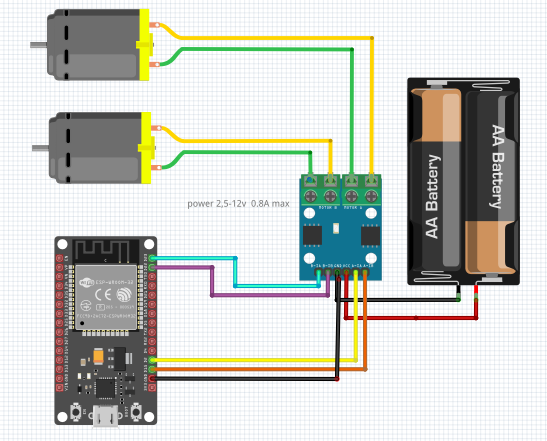

In [42]:
%serialconnect --port=/dev/ttyUSB1 --baud=115200  #connexion série avec ESP32

Connecting to --port=/dev/ttyUSB1 --baud=115200 
Ready.


On efface le main.py présent dans l'esp32, afin d'éviter les conflits.

In [44]:
import os
print("avant: ",os.listdir(""))  # affichage de la liste des fichiers contenu dans la mémoire de ESP32
os.remove('main.py')  # efface le fichier "main.py"
print("apres: ",os.listdir("")) # affichage de la liste des fichiers après 

avant:  ['L9110.py', 'boot.py', 'mqtt_as.py']


Traceback (most recent call last):
  File "<stdin>", line 3, in <module>
OSError: [Errno 2] ENOENT


In [26]:
%sendtofile --source mqtt_as.py

Sent 647 lines (23171 bytes) to mqtt_as.py.


In [28]:
%sendtofile --source L9110.py

Sent 28 lines (663 bytes) to L9110.py.


On écrit dans la mémoire de ESP32 la bibliothèque mqtt_as.py et le programme principal suivant dans le fichier main.py, qui sera lancé après appui sur boot

In [ ]:
#%sendtofile main.py

from mqtt_as import MQTTClient, config #importation des class MQTTClient et config du module mqtt_as
from machine import Pin, PWM #importation de la classe Pin du module machine
from time import sleep
import uasyncio#importation du module uasyncio
import L9110


#configuration des connections
config['server'] = "test.mosquitto.org"#hostname du  broker
config['ssid'] = "STI2D-SIN"#configuration wifi
config['wifi_pw'] = "SIN2020-2021"#mot de passe

#configuration des broches D22 et D23 pour moteur A
motor1 = L9110.DRL9110(2, 4)
motor2 = L9110.DRL9110(22, 23)
#fonction appele lors de la communication avec le broker
def callback(topic, msg, retained):        
    if topic == b'test/pwm_lat': 
        i1=msg.decode("utf-8")        
        i1=int(i1)
        print("i1 = ",i1)
        motor1.set_speed(i1)        
        motor1.forward()       
    if topic == b'test/pwm_long': 
        i2=msg.decode("utf-8")        
        i2=int(i2)
        print("i2 = ",i2)
        motor2.set_speed(i2)
        motor2.forward()
   
                
#souscription à tous les topics test/
async def conn_han(client):
    await client.subscribe('test/pwm_lat', 0)
    await client.subscribe('test/pwm_long', 0)
    
#programme principal  
async def main(client):
    await client.connect() #connection du client au broker en wifi
    while True:
        await uasyncio.sleep(1)

#configuration pour la gestion des publications et souscriptions
config['subs_cb'] = callback
config['connect_coro'] = conn_han

MQTTClient.DEBUG = True # affichage des messages de diagnostic
client = MQTTClient(config) #création de l'objet client par instanciation de la classe MQTTClient()

try:
    uasyncio.run(main(client)) #mise en route du programme principal 
finally:
    client.close()

.Checking WiFi integrity.
.Got reliable connection
Connecting to broker.
Connected to broker.
....RAM free 91280 alloc 19888
i1 =  901
i2 =  843
.i1 =  0
i2 =  0
...RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
....RAM free 91280 alloc 19888
...

l'ESP32 doit être connecté à via l'usb à une source d'alimentation (PC), le moteur doit aussi être connecté à une alimentation (brancher le transfo sur une prise 230V).
Vous pouvez maintenant commander la vitesse de votre moteur, pour cela il faut :
- Ouvrir VSCcodium (menu "programmation"),
- Dans VSCcodium , ouvrir le répertoire ESP32, vous verrez afficher les fichiers dans l'explorateur sur la colonne de gauche.
![fig3.png](image/fig3.png)
- ouvrir un nouveau terminal (onglet terminal sur VSCcodium)
- tapez la commande suivante : streamlit run mqtt_et_streamlit.py
 - Le navigateur s'ouvre sur une page, ou vous trouverez un slider pour compmander la vitesse du moteur
  et un graphique qui affiche la valeur de la tension présente sur l'entrée 23, on peut la faire varier en manipulant le potentiometre qui est branché sur l'entrée 23
  
